In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [998]:
train_df = pd.read_csv("./spaceship-titanic/train.csv")
test_df = pd.read_csv("./spaceship-titanic/test.csv")

In [1000]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [1002]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [1004]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


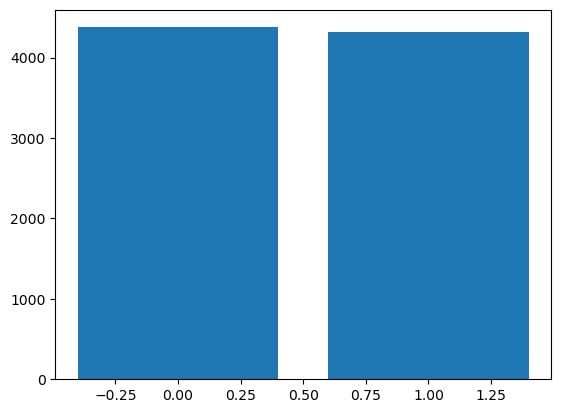

In [1005]:
plt.bar(x=[0,1],height=train_df["Transported"].value_counts())
plt.show()

In [1007]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [1229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

In [1011]:
class CabinPreprocress(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self

    def transform(self,x):
        encoder = OneHotEncoder()
        x[['Deck', 'Num', 'Side']] = x['Cabin'].str.split('/', expand = True)
        x = x.drop(columns = ['Cabin'])
        # x['Deck'] = x['Deck'].fillna('Unknow')
        x['Deck'] = x['Deck'].fillna('U')
        x['Num'] = x['Num'].fillna(-1)
        x['Side'] = x['Side'].fillna('U')
        x['Deck'] = x['Deck'].map({'U' : -1,'G' : 0, 'F' : 1, 'E' : 2, 'D' : 3, 'C' : 4, 'B' : 5, 'A' : 6,'T' : 7})
        x['Side'] = x['Side'].map({'U' : -1, 'P' : 1, 'S' : 2})
        return x

In [1014]:
class FillnaPreprocress(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self

    def transform(self,x):
        # KNNImputer จะทำการเติมช่อง null ด้วยค่าเฉลี่ยของ n nei ใน dataset (n_neighborsint, default=5) = หาค่าเฉลี่ยจาก 5 ค่าที่ใกล้ที่สุด
        imputer = KNNImputer()
        # imputer = SimpleImputer(strategy="mean") # ค่าเฉลี่ยข้อมูลทั้งหมดใน col
        x["Age"] = imputer.fit_transform(x[["Age"]])
        x["VIP"] = imputer.fit_transform(x[["VIP"]])
        x["CryoSleep"] = imputer.fit_transform(x[["CryoSleep"]])
        x["RoomService"] = imputer.fit_transform(x[["RoomService"]])
        x["FoodCourt"] = imputer.fit_transform(x[["FoodCourt"]])
        x["ShoppingMall"] = imputer.fit_transform(x[["ShoppingMall"]])
        x["Spa"] = imputer.fit_transform(x[["Spa"]])
        x["VRDeck"] = imputer.fit_transform(x[["VRDeck"]])
        
        return x
        

In [1016]:
class OnehotHomePlanetAndDestination(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self

    def transform(self,x):
        encoder = OneHotEncoder()
        x["HomePlanet"] = x["HomePlanet"].fillna('UnknowDestination')
        list1 = encoder.fit_transform(x[["HomePlanet"]]).toarray()
        x["Destination"] = x["Destination"].fillna('UnknowPlanet')
        list2 = encoder.fit_transform(x[["Destination"]]).toarray()
        # print(list1)
        # print(list2)
        homePlanet = ["Earth","Europa","Mars","UnknowPlanet"]
        destination = ["55 Cancri e","PSO J318.5-22","TRAPPIST-1e","UnknowDestination"]

        for i in range(len(list1.T)):
            x[homePlanet[i]] = list1.T[i]

        for i in range(len(list2.T)):
            x[destination[i]] = list2.T[i]
            
        x = x.drop(columns =["HomePlanet","Destination"])
        return x
        

In [1018]:
class Drop(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self

    def transform(self,x):        
        x = x.drop(columns = ["PassengerId","Name"])
        return x

In [1020]:
pipeline = Pipeline([("cabinpreprocress",CabinPreprocress()),
                     ("fillna",FillnaPreprocress()),
                     ("onehotHomePlanetAndDestination",OnehotHomePlanetAndDestination()),
                        ("drop",Drop())])

In [1022]:
y = train_df["Transported"]
df = train_df.drop(columns = ["Transported"])
x = pipeline.fit_transform(df)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train)
print(y_train)
print(x_train.isna().sum())

      CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall      Spa  \
4278        0.0  54.0  0.0     0.000000      559.0           0.0  15238.0   
5971        0.0  20.0  0.0     0.000000       20.0           1.0    696.0   
464         0.0  43.0  0.0  1821.000000        0.0          47.0     29.0   
4475        0.0  24.0  0.0   185.000000        0.0         476.0   1810.0   
8469        1.0  25.0  0.0     0.000000        0.0           0.0      0.0   
...         ...   ...  ...          ...        ...           ...      ...   
4373        1.0  32.0  0.0     0.000000        0.0           0.0      0.0   
7891        0.0  22.0  0.0     0.000000        0.0           6.0      0.0   
4859        0.0  29.0  0.0   523.000000        0.0          21.0      4.0   
3264        0.0   0.0  0.0     0.000000        0.0           0.0      0.0   
2732        0.0  45.0  0.0   224.687617        9.0           0.0    857.0   

      VRDeck  Deck   Num  Side  Earth  Europa  Mars  UnknowPlanet  \
4278  

In [1258]:
def plotRelationwithTransportedBar(col,x):
    unique = x[col].unique()
    categories = ["False", "True"]
    counts = {cat: [] for cat in categories}
    
    for i in unique:
        val = x[x[col] == i]["Transported"].value_counts()
        counts["False"].append(val.get(False, 0))
        counts["True"].append(val.get(True, 0))
    
    x = np.arange(len(unique))  
    width = 0.2
    
    fig, ax = plt.subplots(figsize=(5, 3))
    
    rects1 = ax.bar(x - width/2, counts["False"], width, label='False')
    rects2 = ax.bar(x + width/2, counts["True"], width, label='True')
    
    # Add labels, title, and legend
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title('Transported Counts by ' + col)
    ax.set_xticks(x)
    ax.set_xticklabels(unique)
    ax.legend(title="Transported")
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()


In [1275]:
def plotRelationwithTransportedScatter(col,x,row=None):
    if (row==None):
        y = [i for i in range(len(x[col]))]
        y_label = "Index"
    else:
        y = x[row]
        y_label = row
    transported = x["Transported"]
    colors = ['orange' if t else 'blue' for t in transported]  # Orange for true, blue for false
    plt.scatter(y, x[col], c=colors)
    plt.xlabel(col)
    plt.ylabel(y_label)
    plt.title(f"Scatter Plot of {col} with Transported Coloring")
    plt.show()

In [1251]:
plot_x = x
plot_x["Transported"] = y
plot_x.head

<bound method NDFrame.head of       CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0           0.0  39.0  0.0          0.0        0.0           0.0     0.0   
1           0.0  24.0  0.0        109.0        9.0          25.0   549.0   
2           0.0  58.0  1.0         43.0     3576.0           0.0  6715.0   
3           0.0  33.0  0.0          0.0     1283.0         371.0  3329.0   
4           0.0  16.0  0.0        303.0       70.0         151.0   565.0   
...         ...   ...  ...          ...        ...           ...     ...   
8688        0.0  41.0  1.0          0.0     6819.0           0.0  1643.0   
8689        1.0  18.0  0.0          0.0        0.0           0.0     0.0   
8690        0.0  26.0  0.0          0.0        0.0        1872.0     1.0   
8691        0.0  32.0  0.0          0.0     1049.0           0.0   353.0   
8692        0.0  44.0  0.0        126.0     4688.0           0.0     0.0   

      VRDeck  Deck   Num  Side  Earth  Europa  Mars  Unkn

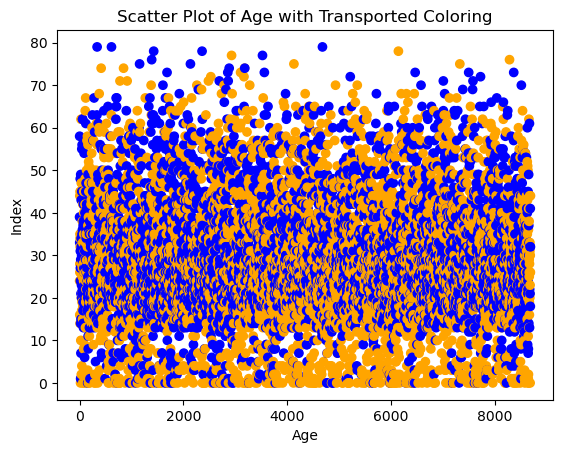

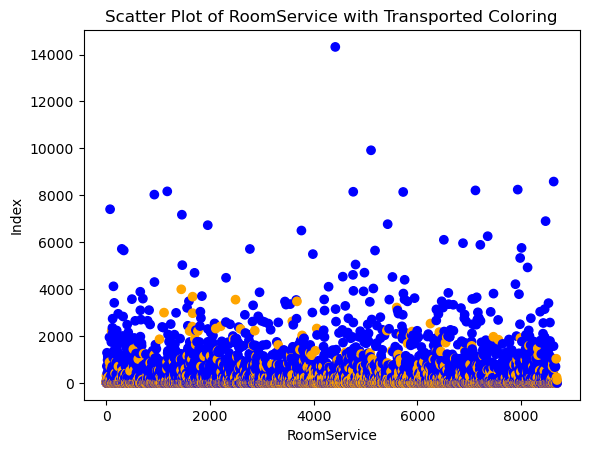

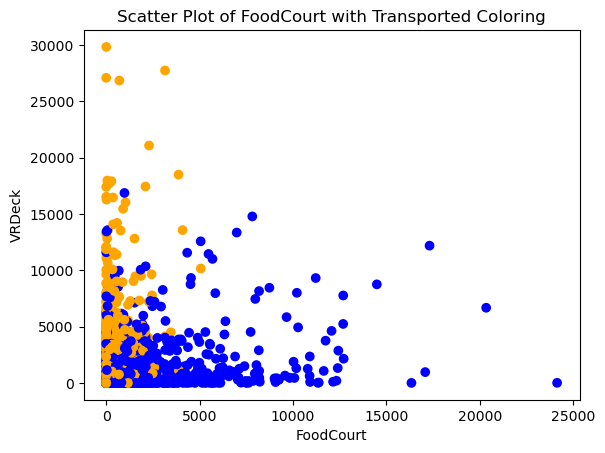

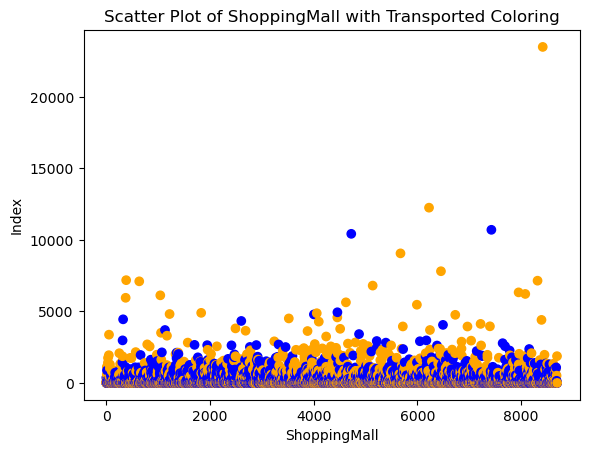

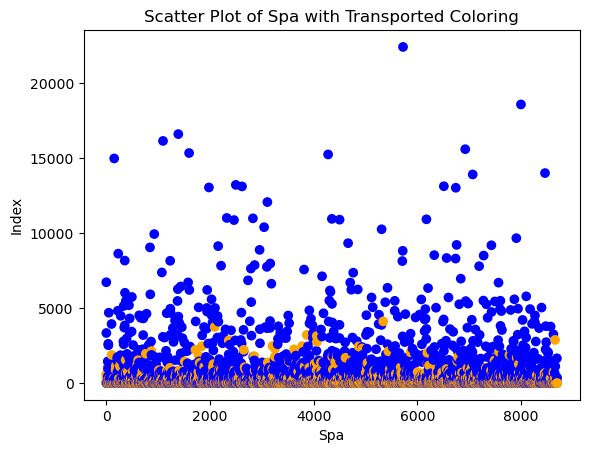

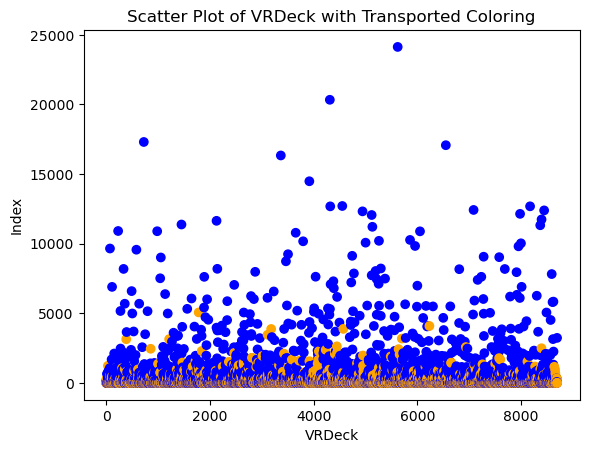

In [1277]:
plotRelationwithTransportedScatter('Age',plot_x)
plotRelationwithTransportedScatter('RoomService',plot_x)
plotRelationwithTransportedScatter('FoodCourt',plot_x,"VRDeck")
plotRelationwithTransportedScatter('ShoppingMall',plot_x)
plotRelationwithTransportedScatter('Spa',plot_x)
plotRelationwithTransportedScatter('VRDeck',plot_x)

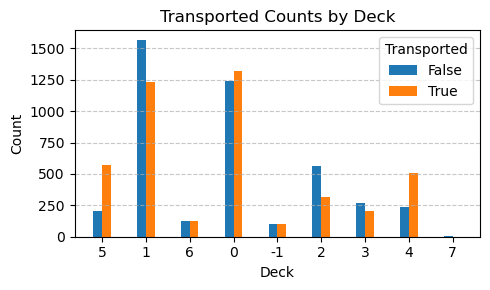

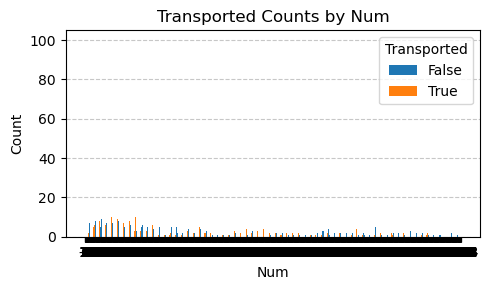

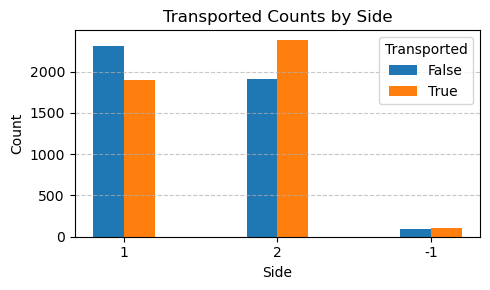

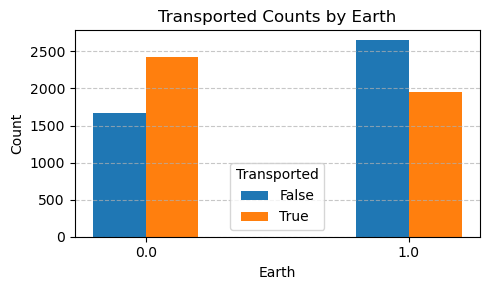

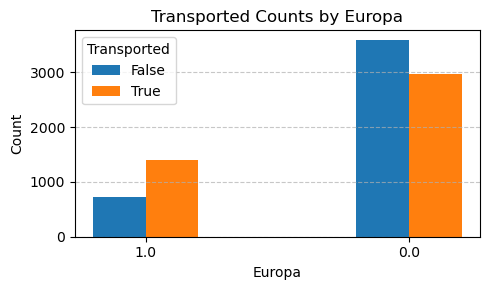

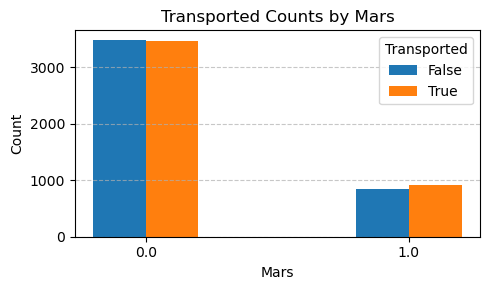

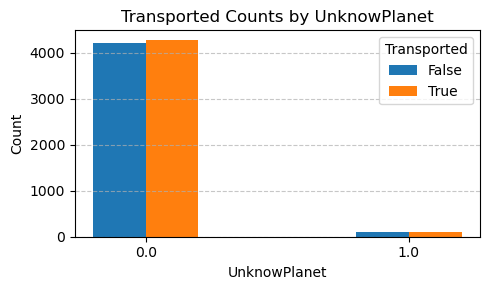

In [1153]:
plotRelationwithTransportedBar('Deck',plot_x)
plotRelationwithTransportedBar('Num',plot_x)
plotRelationwithTransportedBar('Side',plot_x)
plotRelationwithTransportedBar('Earth',plot_x)
plotRelationwithTransportedBar('Europa',plot_x)
plotRelationwithTransportedBar('Mars',plot_x)
plotRelationwithTransportedBar('UnknowPlanet',plot_x)

In [1239]:
# น่าจะเหมาะกว่า linear classfication เพราะ เป็นค่าทั่ไม่เเบ่งชัดเจน เเต่ ค่าบ้างค่าเช่น NUM ใน col -1 กับ Earth มีจำนวนที่หายตัวไปมากกว่า col อื่นเห็นได้ชัด
# สร้างกฎจากข้อมูล
model1 = DecisionTreeClassifier()
# ดึงข้อมูล n nei มา k ตัว เเล้วดูว่ามี class อะไรมากสุด
model2 = KNeighborsClassifier(n_neighbors=5)
# ต้นไม้หลายต้น กฎหลายข้อ เเล้วนำต้นไม้หลายมารวมกันตัดสิน (major vote) ในตอนท้าย
model3 = RandomForestClassifier()

In [1241]:
model1.fit(x_train,y_train)
result = model1.predict(x_test)
accuracy_score(y_test, result)

0.7596319723979299

In [1243]:
model2.fit(x_train, y_train)
result = model2.predict(x_test)
accuracy_score(y_test, result)

0.7659574468085106

In [1214]:
model3.fit(x_train, y_train)
result = model3.predict(x_test)
accuracy_score(y_test, result)

0.8004600345025877

In [1237]:
x_sub = pipeline.fit_transform(test_df)
x_pID = test_df['PassengerId']
result = model_3.predict(x_sub)

submission = pd.DataFrame()
submission['PassengerId'] = x_pID
submission['Transported'] = result

submission.to_csv('submission.csv', index = False)